<a href="https://colab.research.google.com/github/Raanank10/Rain_in_Australia/blob/elad_20210706/Rain_in_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rain in Australia EDA


In [1]:
# General tools
import numpy as np
import scipy as sp
import pandas as pd

# SK Learn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import log_loss

# Misc
import warnings
from sys import modules
from time import time

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Confuguration
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Data

In [2]:
url = 'https://raw.githubusercontent.com/Raanank10/Rain_in_Australia/main/weatherAUS.csv'

data = pd.read_csv(url)
data.head(10)

Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No
5  2008-12-06   Albury     14.6  ...     28.9         No            No
6  2008-12-07   Albury     14.3  ...     24.6         No            No
7  2008-12-08   Albury      7.7  ...     25.5         No            No
8  2008-12-09   Albury      9.7  ...     30.2         No           Yes
9  2008-12-10   Albury     13.1  ...     28.2        Yes            No

[10 rows x 23 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
#elad 2021 Jul 05

# Data Cleaning

In [5]:
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [6]:
unique_data = data.drop_duplicates(inplace=False)
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
unique_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Drop all rows where RainToday is Nan, Drop all rows where RainTomorrow is Nan

In [8]:
#data[data['RainToday'].notna() && data['RainTomorrow'].notna()]
print(f'data len = {len(data)}')
data = data[data['RainToday'].notna()]
print(f'data len = {len(data)}')
data = data[data['RainTomorrow'].notna()]
print(f'data len = {len(data)}')

data len = 145460
data len = 142199
data len = 140787


what do we do with missing data? ignore or mean or median? I think mean only if the feature is important 

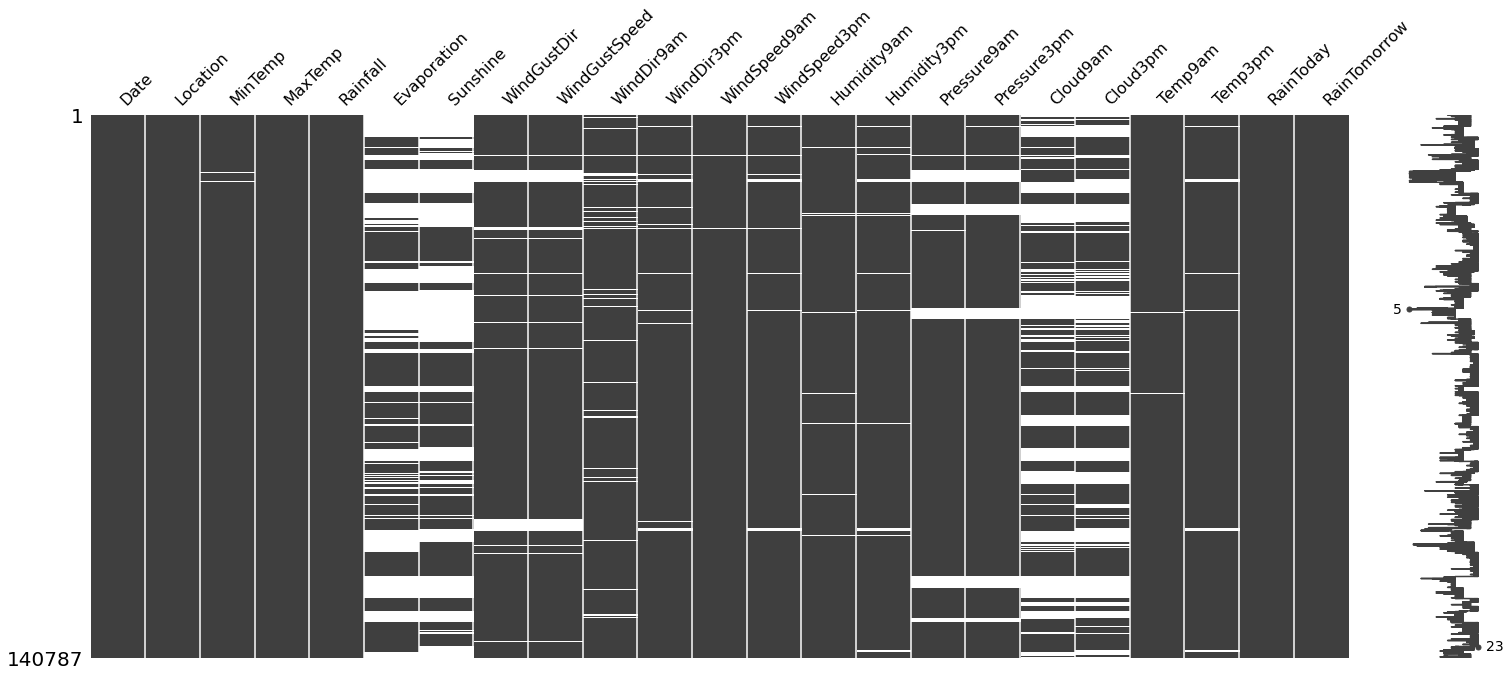

In [9]:
msno.matrix(data)

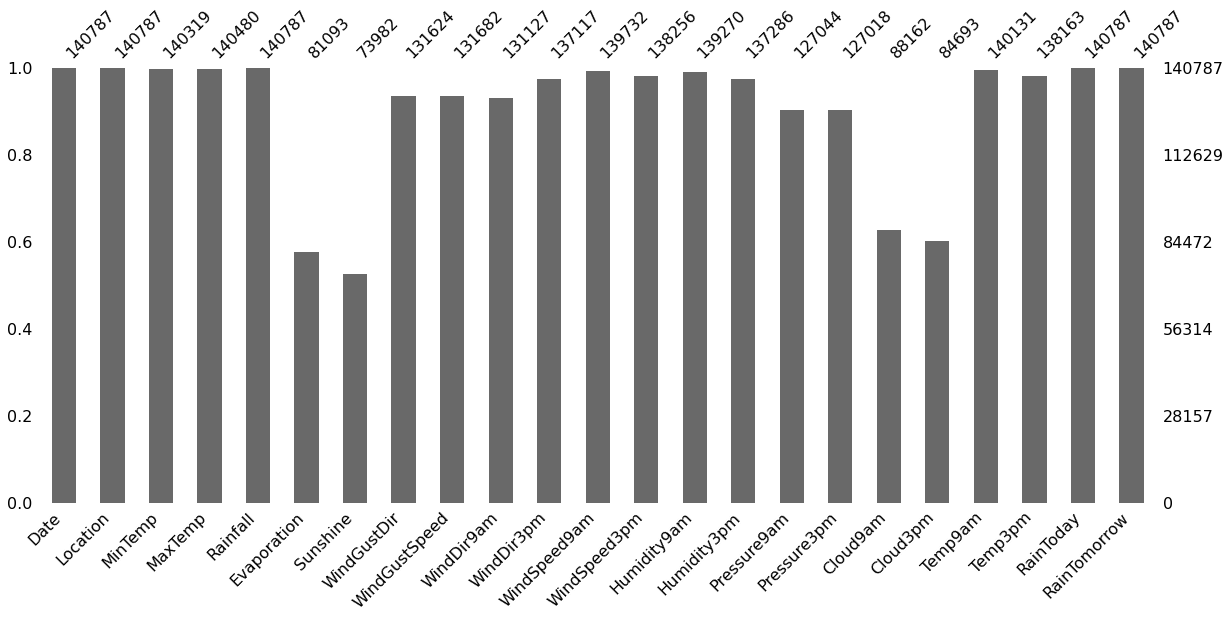

In [10]:
msno.bar(data, figsize=(20, 8))

Convert RainToday and RainTomorrow to int



In [11]:
data['RainToday'] = data.RainToday.apply(lambda x: 1 if x == 'Yes' else 0)
data['RainTomorrow'] = data.RainTomorrow.apply(lambda x: 1 if x == 'Yes' else 0)

In [12]:
data.RainToday.value_counts()

0    109332
1     31455
Name: RainToday, dtype: int64

In [13]:
data.RainTomorrow.value_counts()

0    109586
1     31201
Name: RainTomorrow, dtype: int64

In [14]:
unique_data = data.drop_duplicates(inplace=False)
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [15]:
unique_data.describe()

MinTemp       MaxTemp  ...      RainToday   RainTomorrow
count  140319.000000  140480.00000  ...  140787.000000  140787.000000
mean       12.184824      23.23512  ...       0.223423       0.221618
std         6.403879       7.11450  ...       0.416541       0.415337
min        -8.500000      -4.80000  ...       0.000000       0.000000
25%         7.600000      17.90000  ...       0.000000       0.000000
50%        12.000000      22.60000  ...       0.000000       0.000000
75%        16.800000      28.30000  ...       0.000000       0.000000
max        33.900000      48.10000  ...       1.000000       1.000000

[8 rows x 18 columns]

## Preprocessing

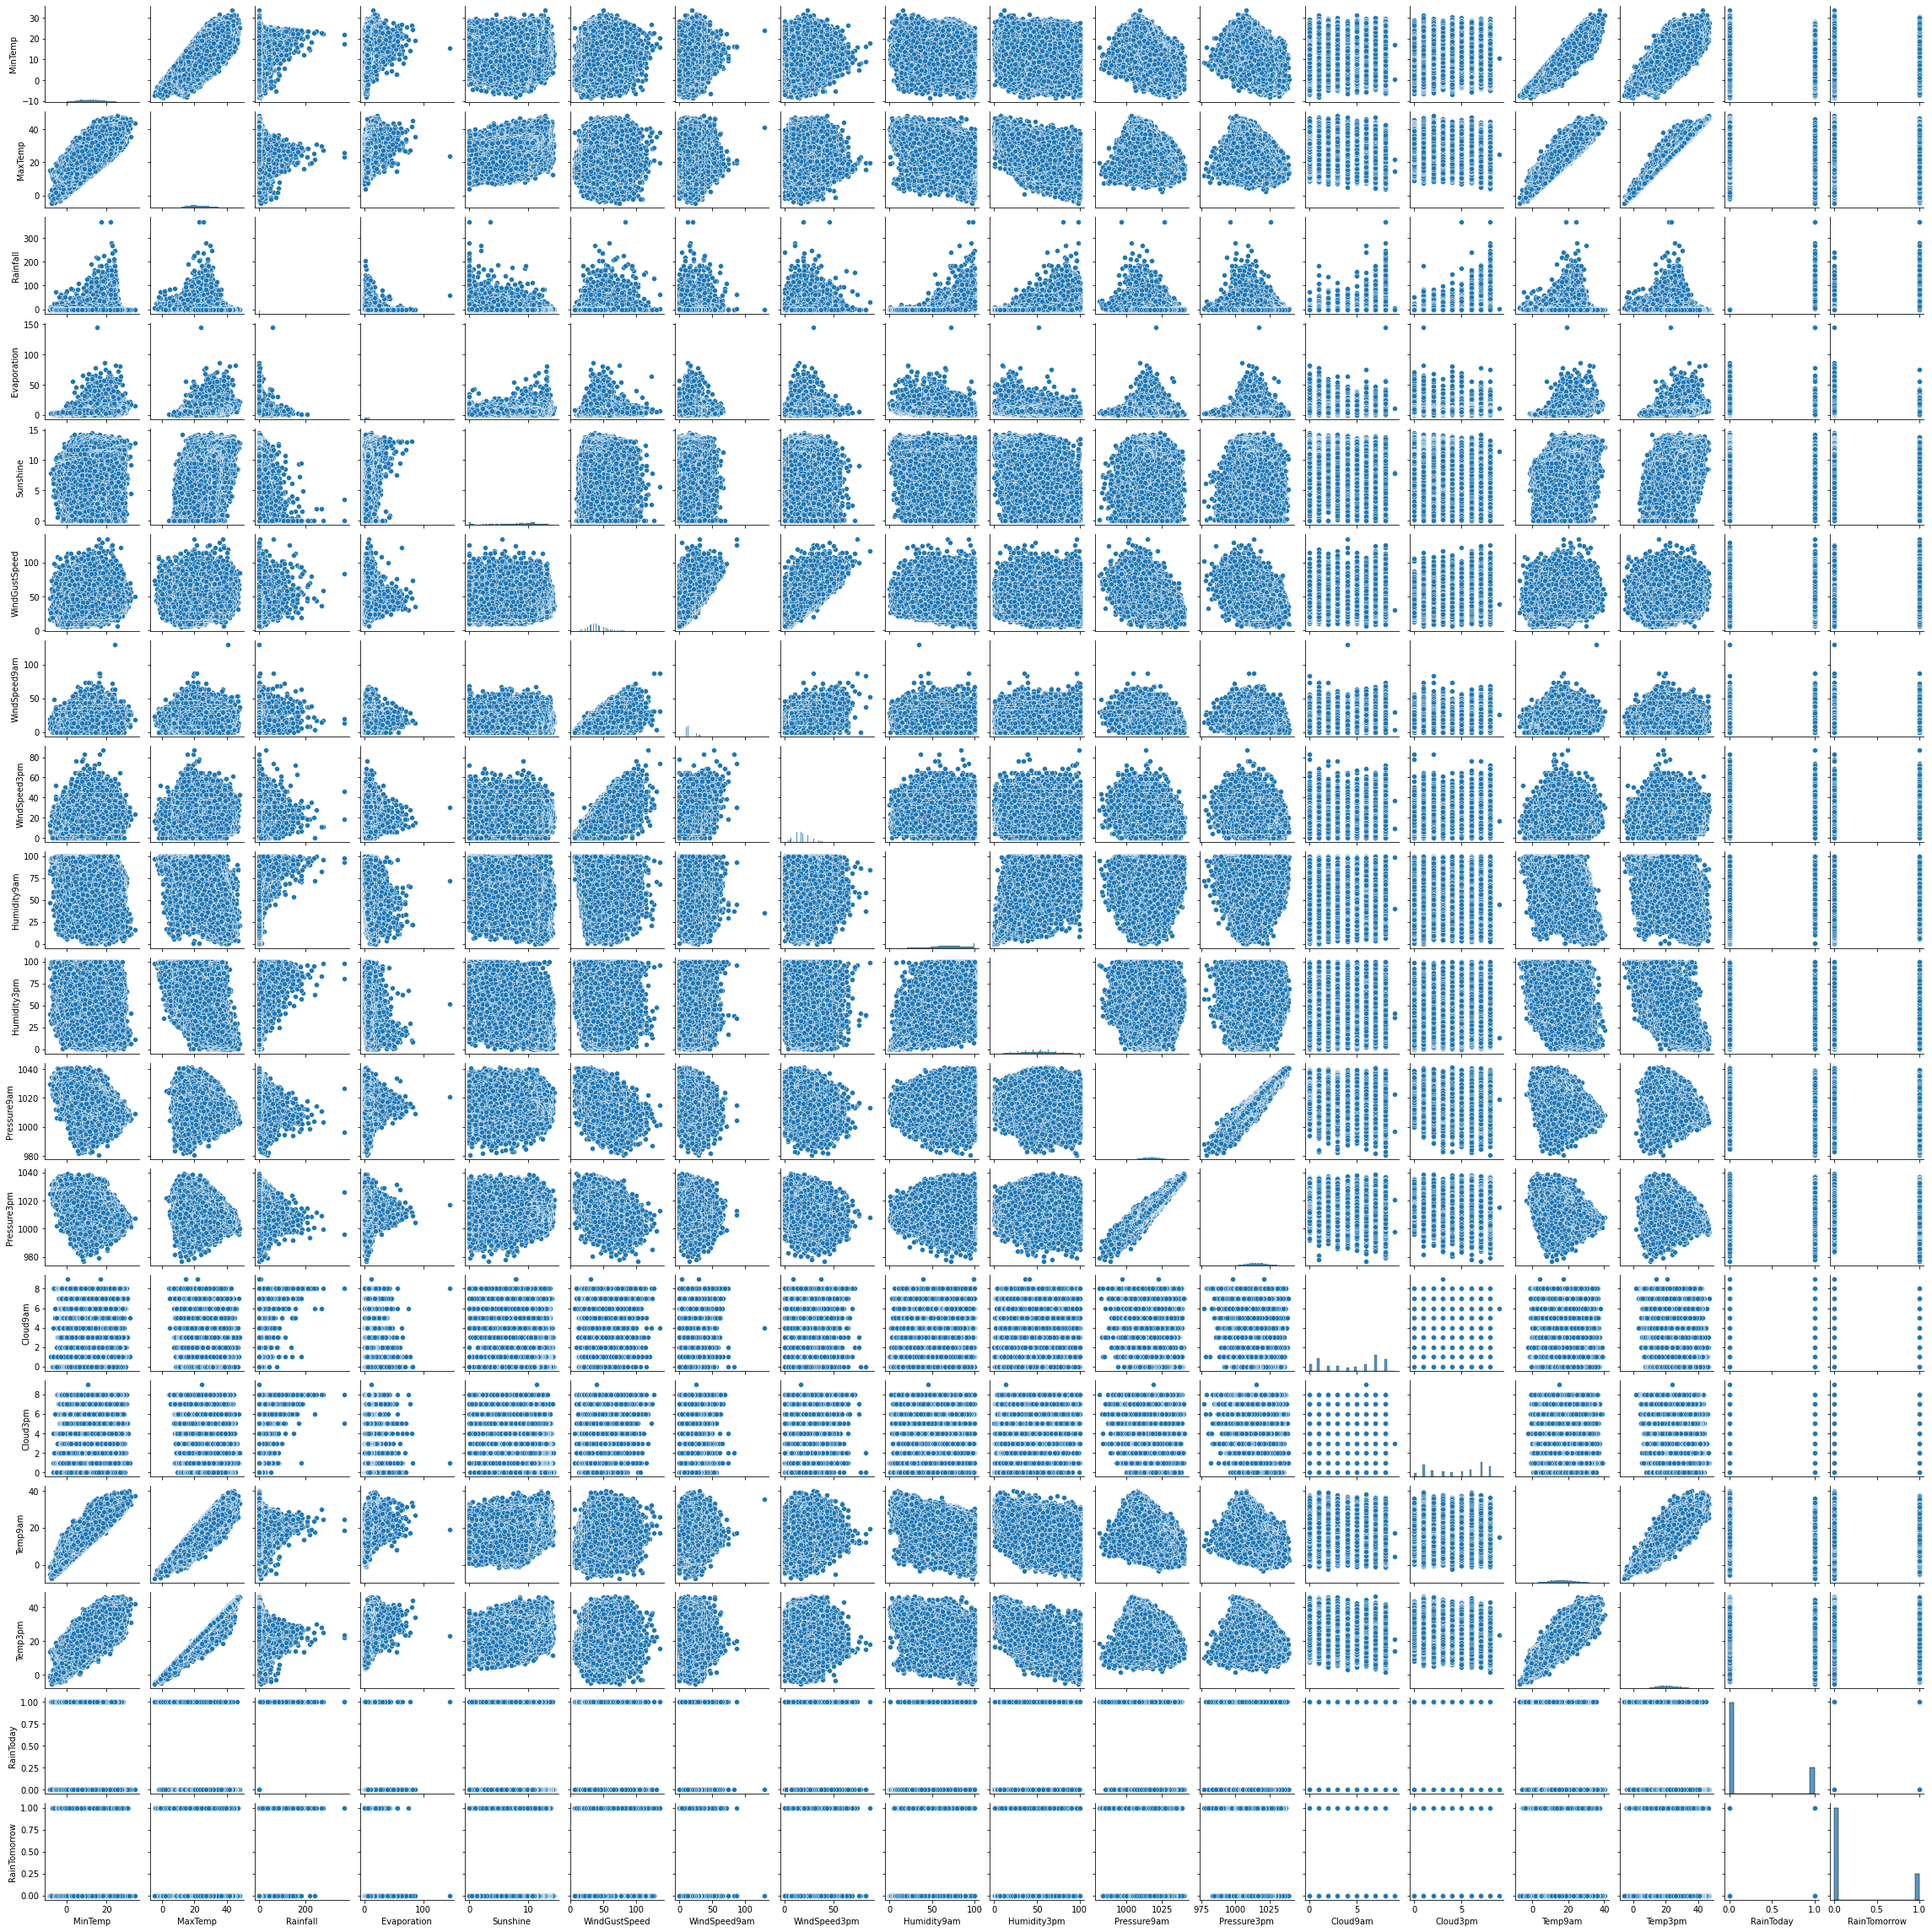

In [16]:
unique_data = unique_data.select_dtypes(include=np.number)
sns.pairplot(unique_data,height=1.8)

In [17]:
unique_data.corr()

MinTemp   MaxTemp  Rainfall  ...   Temp3pm  RainToday  RainTomorrow
MinTemp        1.000000  0.736015  0.104255  ...  0.708716   0.056185      0.084322
MaxTemp        0.736015  1.000000 -0.074839  ...  0.984565  -0.228884     -0.159405
Rainfall       0.104255 -0.074839  1.000000  ... -0.079178   0.500997      0.239032
Evaporation    0.467147  0.588934 -0.064549  ...  0.574311  -0.187975     -0.119133
Sunshine       0.073078  0.470221 -0.227525  ...  0.490386  -0.330635     -0.451820
WindGustSpeed  0.177927  0.068510  0.133497  ...  0.033511   0.155490      0.234285
WindSpeed9am   0.175775  0.014468  0.086816  ...  0.004878   0.102267      0.089803
WindSpeed3pm   0.175835  0.051178  0.057759  ...  0.028845   0.080074      0.086762
Humidity9am   -0.234441 -0.506109  0.223725  ... -0.500528   0.353358      0.257727
Humidity3pm    0.005686 -0.509916  0.255312  ... -0.558562   0.378766      0.447834
Pressure9am   -0.451414 -0.331831 -0.168085  ... -0.286890  -0.189804     -0.248253
Pressure3pm   -0.462099 -0.427069 -0.126728  ... -0.389684  -0.106298     -0.228192
Cloud9am       0.077367 -0.290217  0.198195  ... -0.302840   0.305950      0.316592
Cloud3pm       0.020268 -0.279261  0.171993  ... -0.318336   0.272149      0.382418
Temp9am        0.901828  0.887038  0.011477  ...  0.860633  -0.096593     -0.025447
Temp3pm        0.708716  0.984565 -0.079178  ...  1.000000  -0.234925     -0.192747
RainToday      0.056185 -0.228884  0.500997  ... -0.234925   1.000000      0.313097
RainTomorrow   0.084322 -0.159405  0.239032  ... -0.192747   0.313097      1.000000

[18 rows x 18 columns]

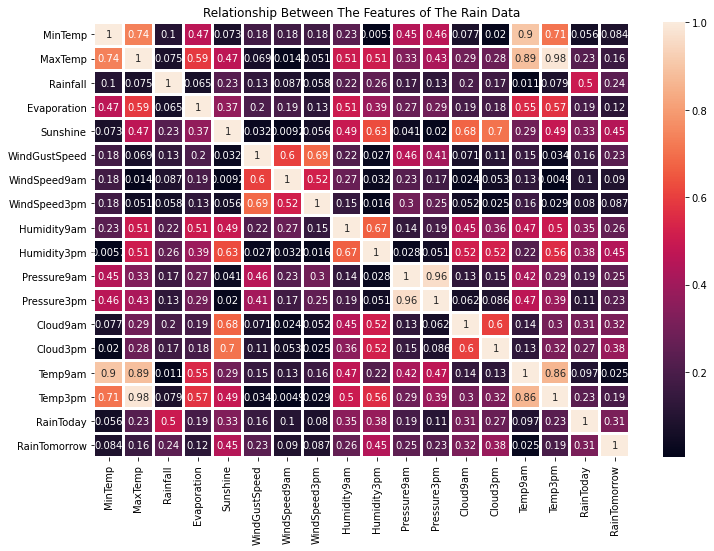

In [18]:
plt.figure(figsize=(12,8))
plt.title("Relationship Between The Features of The Rain Data")
sns.heatmap(unique_data.corr().abs(), annot=True, linewidths = 2, linecolor = "white")

Handle columns with type Object and not Number

In [25]:
data.select_dtypes(include=object).nunique()

Date           3436
Location         49
WindGustDir      16
WindDir9am       16
WindDir3pm       16
dtype: int64

Column Location have 49 unique values , Sydney have 3331 records


In [28]:
data.Location.value_counts().head() 

Canberra    3402
Sydney      3331
Perth       3193
Darwin      3192
Hobart      3183
Name: Location, dtype: int64

In [56]:
data.groupby('Location').agg({'RainToday':'sum'}).sort_values('RainToday', ascending=False).head()

RainToday
Location               
Portland           1088
Cairns              941
Walpole             928
Dartmoor            921
MountGambier        919

# Feature Engineering

In [19]:
data['DiffTemp']=data['MaxTemp']-data['MinTemp']
data.head()

Date Location  MinTemp  ...  RainToday  RainTomorrow  DiffTemp
0  2008-12-01   Albury     13.4  ...          0             0       9.5
1  2008-12-02   Albury      7.4  ...          0             0      17.7
2  2008-12-03   Albury     12.9  ...          0             0      12.8
3  2008-12-04   Albury      9.2  ...          0             0      18.8
4  2008-12-05   Albury     17.5  ...          0             0      14.8

[5 rows x 24 columns]